<div style='background-color: orange'>
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align: center'>
        Table of Contents
    </h1></i></u></b>
<li><a href='#imports'>Imports</a></li>
<li><a href='#wrangle'>Wrangle</a></li>
<li><a href='#explore'>Exploration</a></li>
<li><a href='#model'>Modeling</a></li>
<li><a href='#conclusion'>Conclusion</a></li>

<div style='background-color: orange'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align: center'>
        Imports
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [1]:
# Import 'final.py' to expedite and maintain cleanliness
# of this file...
import final as f

<div style='background-color: orange'>
<a id='wrangle'></a>
    <b><u><i><h1 style='text-align: center'>
        Wrangle
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<h3><b>Acquire</b></h3>

Obtain both the 'red' and 'white' wine datasets from <a href='https://data.world/food/wine-quality'>Data.World Wine Quality Dataset</a>

In [2]:
red, white = f.acquire()
red.shape, white.shape

((1599, 12), (4898, 12))

- Vanilla 'red' dataset shape
    - Rows: 1599
    - Columns: 12
- Vanilla 'white' dataset shape
    - Rows: 4898
    - Columns: 12

---

<h3><b>Prepare</b></h3>

- Similarity between datasets
    - Number of columns
    - Column names
    - Column dtypes
    - Column value inputs
    
<b>THEREFORE:</b> Join both 'red' and 'white' wine on a row-to-row basis

In [3]:
# From the 'final.py' file...
# Get the prepared dataframe of both wine datasets
wines = f.prepare()
wines.shape

(6497, 13)

- Prepared 'wine' dataset shape
    - Rows: 6497
    - Columns: 13

---

<h3><b>Nulls</b></h3>

- Absence of null values in entire dataframe

---

<h3><b>Split</b></h3>

- Train
    - 70%
- Validate
    - 20%
- Test
    - 10%

<div style='background-color: orange'>
<a id='explore'></a>
    <b><u><i><h1 style='text-align: center'>
        Exploration
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
    <li><a href='#visuals'>Key Visuals</a></li>
    <li><a href='#cluster'>Clusters</a></li>
    <li><a href='#exploresummary'>Summary</a></li>

<a id='visuals'></a>
<h3><b>Key Visuals</b></h3>
<li><a href='#explore'>Exploration Top</a></li>

<b>Question 1:</b> Does lower sulphates lead to better wine quality?

<b>H$_0$:</b> Lower sulphates does not have a direct impact on wine quality.

<b>H$_a$:</b> Lower sulphates does have a direct impact on wine quality.

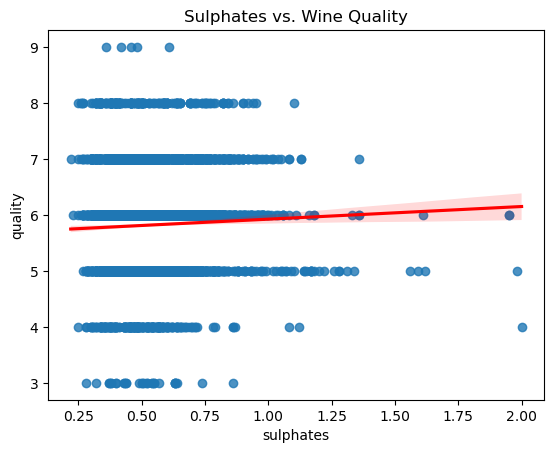

In [4]:
# From the 'final.py' file...
# Get the regplot of sulphates vs. quality
f.visual1()

In [5]:
# From the 'final.py' file...
# Get the statistics of sulphates vs. quality
f.stat1()

========== REJECT NULL HYPOTHESIS! ==========
Features: Sulphates vs. Quality
Correlation: 0.0298
P-Value: 0.0162


<b>Q1 Answer:</b> Lower sulphates does appear to impact the wine quality.

---

<b>Question 2:</b> Does higher alcohol lead to better wine quality?

<b>H$_0$:</b> Higher alcohol does not have a direct impact on wine quality.

<b>H$_a$:</b> Higher alcohol does have a direct impact on wine quality.

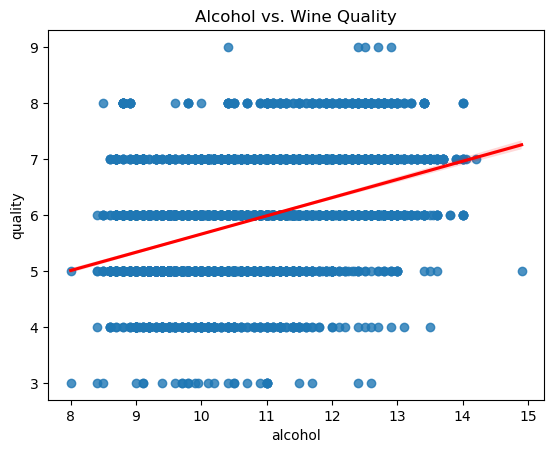

In [6]:
# From the 'final.py' file...
# Get the regplot of alcohol vs. quality
f.visual2()

In [7]:
# From the 'final.py' file...
# Get the statistics of alcohol vs. quality
f.stat2()

========== REJECT NULL HYPOTHESIS! ==========
Features: Alcohol vs. Quality
Correlation: 0.4469
P-Value: 0.0000


<b>Q2 Answer:</b> Higher alcohol does impact the wine quality.

---

<b>Question 3:</b> Does higher residual sugars lead to better wine quality?

<b>H$_0$:</b> Higher residual sugars does not have a direct impact on wine quality.

<b>H$_a$:</b> Higher residual sugars does have a direct impact on wine quality.

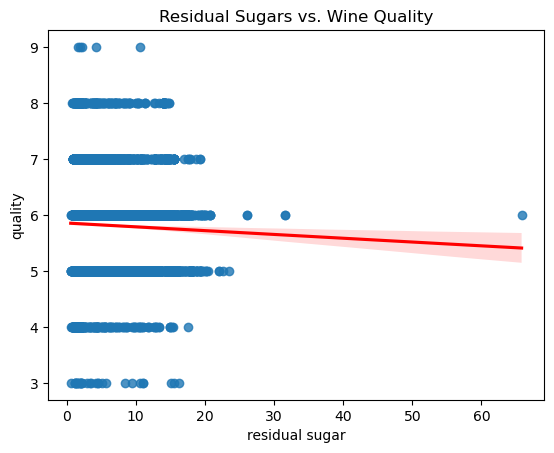

In [8]:
# From the 'final.py' file...
# Get the regplot of residual sugars vs. quality
f.visual3()

In [9]:
# From the 'final.py' file...
# Get the statistics of residual sugars vs. quality
f.stat3()

========== ACCEPT NULL HYPOTHESIS! ==========
Features: Residual Sugar vs. Quality
Correlation: -0.0169
P-Value: 0.1734


<b>Q3 Answer:</b> Higher residual sugars does not impact the wine quality.

---

<b>Question 4:</b> Does lower volatile acidity lead to better wine quality?

<b>H$_0$:</b> Lower volatile acidity does not have a direct impact on wine quality.

<b>H$_a$:</b> Lower volatile acidity does have a direct impact on wine quality.

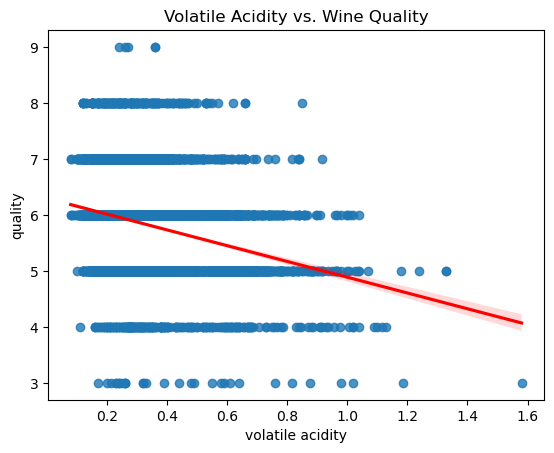

In [10]:
# From the 'final.py' file...
# Get the regplot of volatile acidity vs. quality
f.visual4()

In [11]:
# From the 'final.py' file...
# Get the statistics of volatile acidity vs. quality
f.stat4()

========== REJECT NULL HYPOTHESIS! ==========
Features: Volatile Acidity vs. Quality
Correlation: -0.2578
P-Value: 0.0000


<b>Q4 Answer:</b> Lower volatile acidity does impact the wine quality.

---

<a id='cluster'></a>
<h3><b>Clusters</b></h3>
<li><a href='#explore'>Exploration Top</a></li>

<h5 style='text-align: center'>
    <b><u><i>
        Flavor Cluster
    </i></u></b></h5>
    
- <b>Features For Cluster:</b>
    - 'fixed acidity'
    - 'volatile acidity'
    - 'citric acid'
    - 'residual sugar'
    - 'chlorides'
    - 'free sulfur dioxide'
    - 'total sulfur dioxide'
    - 'density'
    - 'pH'
    - 'sulphates'
    - 'alcohol'

- <b>Reasoning For Cluster:</b>
    - Create cluster of features that affect the wine's flavor in order to determine a balance to help predict a wine's quality.

---

<h5 style='text-align: center'>
    <b><u><i>
        Estimated Wine Balance
    </i></u></b></h5>

- <b>Methodology:</b>
    - Using clusters of the 8 characteristics that define a wine's quality, generate the mean score of all the clusters combined in order to artificially define a wine's balance of characteristics.

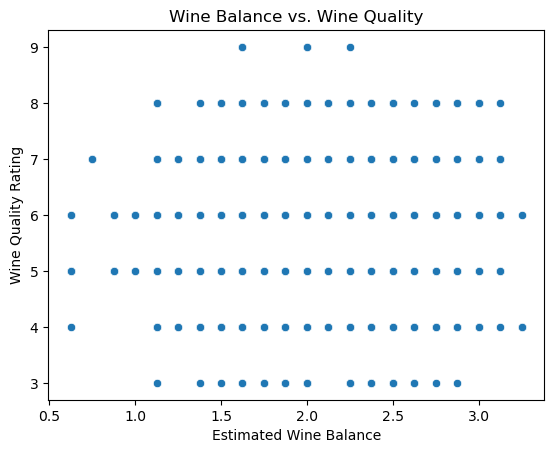

In [12]:
# From the 'final.py' file...
# Visualize the scatterplot of the wine's perceived
# balance and the wine quality
f.visual5()

---

<h5 style='text-align: center'>
    <b><u><i>
        Structure Cluster
    </i></u></b></h5>

- <b>Features For Cluster:</b>
    - 'total sulfur dioxide'
    - 'pH'
    - 'alcohol'
    
- <b>Reasoning For Cluster:</b>
    - Create cluster of features that affect the wine's structure in order to determine a balance to help predict a wine's quality.

---

<a id='exploresummary'></a>
<h3><b>Summary</b></h3>
<li><a href='#explore'>Exploration Top</a></li>

No one feature directly seems to impact the quality of the wine and attempting to create clusters on the current data doesn't tend to output anything meaningful;however, with domain knowledge and further analysis, it's the balance of all the features that dictate the wine's quality.

<div style='background-color: orange'>
<a id='model'></a>
    <b><u><i><h1 style='text-align: center'>
        Modeling
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#baseline'>Baseline</a></li>
<li><a href='#modeltable'>Models Table</a></li>
<li><a href='#bestmodel'>Best Model</a></li>

<a id='baseline'></a>
<h3><b>Baseline</b></h3>
<li><a href='#model'>Modeling Top</a></li>

In [13]:
# From the 'final.py' file...
# Obtain the baseline score of quality via mode
f.baseline()

0.437

---

<a id='modeltable'></a>
<h3><b>Models Table</b></h3>
<li><a href='#model'>Modeling Top</a></li>

In [14]:
# From the 'final.py' file...
# Get the scores of the baseline and 4 unique models
f.models()

,type,hyperparameters,clusters,train_accuracy,validate_accuracy,diff_accuracy
0,baseline,None,None,0.44,0.44,0.00
1,Random Forest Classifier1,"depth=3, ccpalpha=0.0015",None,0.55,0.54,-0.01
2,Random Forest Classifier2,depth=5,Yes,0.52,0.40,-0.12
3,Random Forest Classifier3,"depth=5, ccpalpha=0.0007",Yes,0.56,0.54,-0.02
4,Random Forest Classifier4,n_estimators=100,None,1.00,0.88,-0.12


Accuracy score is the key metric here:

Wanting to find the model that can best predict the quality scores on a consistent basis when compared with the actual quality values.

---

<a id='bestmodel'></a>
<h3><b>Best Model</b></h3>
<li><a href='#model'>Modeling Top</a></li>

In [15]:
# From the 'final.py' file...
# Get the scores of the baseline and the best model
f.best_model()

,type,test_accuracy
0,baseline,0.44
1,Random Forest Classifier4,0.89


<div style='background-color: orange'>
<a id='conclusion'></a>
    <b><u><i><h1 style='text-align: center'>
        Conclusion
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#conclusionsummary'>Summary</a></li>
<li><a href='#rec'>Recommendations</a></li>
<li><a href='#nextsteps'>Next-Steps</a></li>

<a id='conclusionsummary'></a>
<h3><b>Summary</b></h3>
<li><a href='#conclusion'>Conclusion Top</a></li>

Through exploration and clustering, no one feature directly impacts the wine quality.  Rather, it's the wine's balance of all the features combined that better dictates the quality.

---

<a id='rec'></a>
<h3><b>Recommendations</b></h3>
<li><a href='#conclusion'>Conclusion Top</a></li>

Better understand how to literally define the 'balance' of a wine's content in order to better predict a wine's quality.

---

<a id='nextsteps'></a>
<h3><b>Next-Steps</b></h3>
<li><a href='#conclusion'>Conclusion Top</a></li>

Conduct further exploration, feature engineering, and clustering methods in order to better define 'balance' for the machine to understand so that the machine will have a more accurate predictor of higher quality wines.